In [1]:
# import the neccesary libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
import statsmodels.stats.api as sms
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
# read csv data
data_frame = pd.read_csv("../dataset/bank-additional-full.csv",sep=';'  , engine='python')

In [3]:

sns.reset_orig
data_frame.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

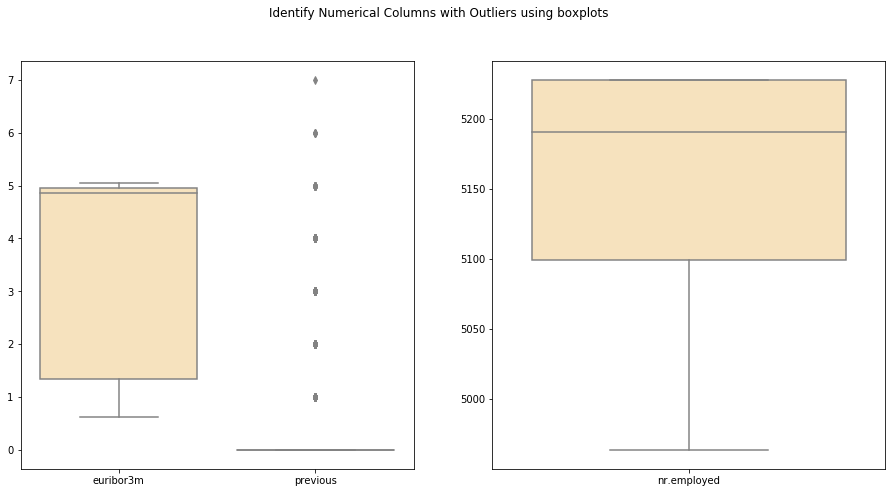

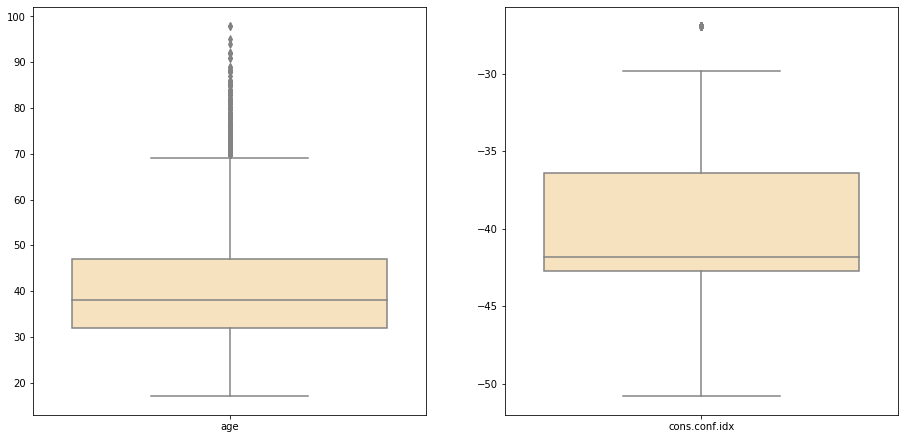

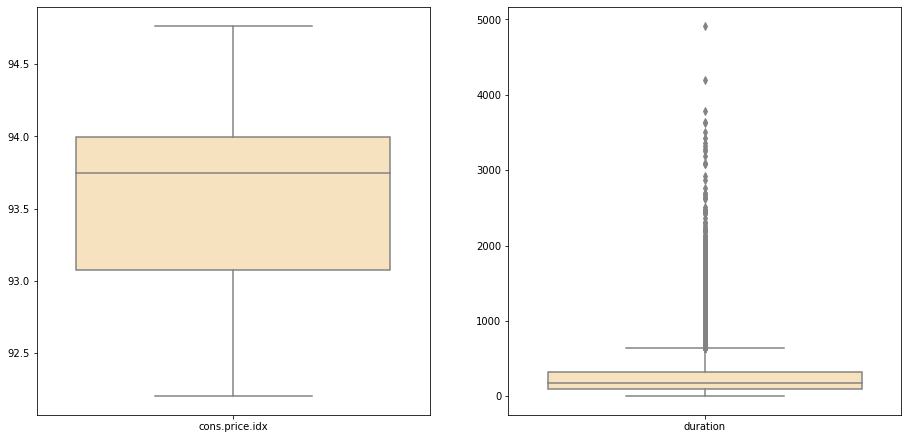

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15.5, 7.5)
fig.suptitle('Identify Numerical Columns with Outliers using boxplots')
sns.boxplot(data=data_frame[['euribor3m','previous']], palette=['moccasin','moccasin'], orient="v",  ax=ax1)
sns.boxplot(data=data_frame[['nr.employed']], orient="v", palette=['moccasin','moccasin'], ax=ax2)

fig, (ax3, ax4) = plt.subplots(1, 2)
sns.boxplot(data=data_frame[['age']], orient="v", palette=['moccasin'], ax=ax3)
sns.boxplot(data=data_frame[['cons.conf.idx']], orient="v", palette=['moccasin'], ax=ax4)
fig.set_size_inches(15.5, 7.5)
fig, (ax5, ax6) = plt.subplots(1, 2)
fig.set_size_inches(15.5, 7.5)
sns.boxplot(data=data_frame[['poutcome','cons.price.idx']], orient="v", palette=['moccasin'], ax=ax5)
sns.boxplot(data=data_frame[['duration']], orient="v", palette=['moccasin'], ax=ax6)

In [5]:
def replace_column_outliers(dataframe,column):
    quartile_one = data_frame[column].quantile(0.25)
    quartiile_three = data_frame[column].quantile(0.75)
    inter_quartile_range=quartiile_three-quartile_one
    Lower_Whisker = quartile_one-1.5*inter_quartile_range
    Upper_Whisker = quartiile_three+1.5*inter_quartile_range
    data_frame.loc[data_frame[column] > Upper_Whisker, column] = data_frame[column].median()

In [6]:
cols_with_outliers = ['duration','age','cons.conf.idx']

def handle_outliers(columns):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig, (ax3) = plt.subplots()

    axes = [ax1,ax2,ax3,ax4]

    i=0
    for column in columns:
        replace_column_outliers(data_frame,column)
        sns.boxplot(data=data_frame[[column]], orient="v", palette=['moccasin'], ax=axes[i])
        i+=1
    

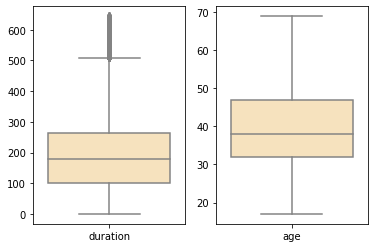

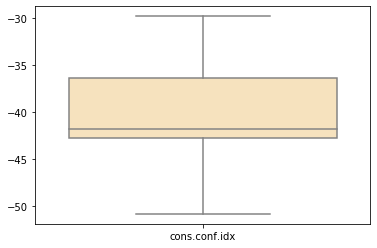

In [7]:
handle_outliers(cols_with_outliers)

In [8]:
class FeatureEngineering:
    def __init__(self):
        self.is_january = False
        self.year=2008
        self.months = dict([('jan', 1),('feb', 2),('mar', 3),('apr', 4),('may', 5),
                ('jun', 6),('jul', 7),('aug', 8),('sep', 9),('oct', 10),('nov', 11),('dec', 12),('kl', 12)])
        self.current_month = 5
        
    def doubleData(self,month):
        current_month = self.months[month]
        if(current_month) >= self.current_month:
            self.current_month = current_month
        else: 
            self.year +=1
            self.current_month = current_month
        return self.year


In [9]:
engineer = FeatureEngineering()

In [10]:
data_frame['Year'] = data_frame.apply(lambda row: engineer.doubleData(row['month']),axis=1)
data_frame.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Year
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), 
                                        ['job','marital','education',
                                         'default','loan','housing','contact',
                                         'month','day_of_week','poutcome']),
                                       
                                       ('drop_columns' , 'drop', ['duration']),
                                       ('scaler', StandardScaler(),
                                        ['age','pdays','previous','emp.var.rate','cons.price.idx',
                                         'cons.conf.idx','euribor3m','nr.employed','Year']),
                                       ], 
                                      remainder='passthrough')



In [51]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
target = data_frame['y']
features = data_frame.loc[:, data_frame.columns != 'y']
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.1,random_state=0)

from sklearn.calibration import CalibratedClassifierCV
classifiers = [
    KNeighborsClassifier(3),
    #XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              #colsample_bynode=1, colsample_bytree=1, gamma=0,
              #learning_rate=0.1, max_delta_step=0, max_depth=3),
    #SVC(kernel="rbf", C=0.025, probability=True),
    #DecisionTreeClassifier(),
    #RandomForestClassifier(),
    #MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=50, alpha=0.0001,
                    # solver='sgd', verbose=10,  random_state=21,tol=0.000000001),
    #LogisticRegression()
    
    ]
for classifier in classifiers:
    #print(classifier)
    pipe = Pipeline([('preprocessor', columnTransformer),
                     ('pca3',PCA(n_components=5)),
                      ('classifier', classifier)])
    keys=list(pipe.named_steps.keys())
    print(keys[2])
    scores = cross_val_score(pipe, X_train, y_train, cv=KFold(n_splits=5,shuffle=True, random_state=1), scoring='accuracy')
    print(scores.mean(),'\n')

classifier
0.8814374538914513 



In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
skf = KFold(n_splits=5,shuffle=True, random_state=1)
for classifier in classifiers:
    pipe = Pipeline([('preprocessor', columnTransformer),
                     ('pca3',PCA(n_components=5)),
                      ('classifier', classifier)])
    scores = cross_val_score(pipe, X_train, y_train, cv=skf, scoring='roc_auc')
    print(scores.mean())

0.692465572679304
